In [47]:
def outliers(df, ft):    
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
            
    lower_bound = Q1 - 1.5 *IQR
    upper_bound = Q3 + 1.5 *IQR
            
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls


In [48]:

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [49]:
import pandas as pd
import numpy as np
from scipy import stats
import os

# List of folders containing CSV files to clean
folders = ['Intention', 'Operation']

# Loop over each folder and CSV file, and clean the data
for folder in folders:
    for file in os.listdir(folder):
        if file.endswith('.csv'):
            # Read the CSV file into a pandas dataframe
            file_path = os.path.join(folder, file)
            df = pd.read_csv(file_path)
            df.shape
            df.describe()

            # Remove null values from both columns
            df = df.dropna(subset=['Before', 'After'],how='all')
            df['Before'] = df['Before'].fillna(value=0)
            df['After'] = df['After'].fillna(value=0)

            index_list = []
            for column in ['Before', 'After']:
                index_list.extend(outliers(df,column))
            
            df_cleaned = remove(df,index_list)
            # Add '0' to cells that contain numbers in one column but not the other
            df_cleaned['Before'] = pd.to_numeric(df_cleaned['Before'], errors='coerce')
            df_cleaned['After'] = pd.to_numeric(df_cleaned['After'], errors='coerce')
            df_cleaned['Before'] = df_cleaned['Before'].fillna(0)
            df_cleaned['After'] = df_cleaned['After'].fillna(0)

            # Ensure that both columns have equal data points
            min_len = min(len(df_cleaned['Before']), len(df_cleaned['After']))
            df_cleaned = df_cleaned.iloc[:min_len, :]

            # Save the cleaned data to a new CSV file
            cleaned_file_path = os.path.join(folder, 'cleaned_' + file)
            df_cleaned.to_csv(cleaned_file_path, index=False)


In [50]:

import matplotlib.pyplot as plt

def create_boxplot(datafile):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(datafile)

    # Select the two columns of data to use for the box plot
    data1 = df['Before']
    data2 = df['After']

    # Create a list of the two columns of data
    data = [data1, data2]

    # Create the box plot using matplotlib
    plt.boxplot(data)

    # Set the x-axis labels
    plt.xticks([1, 2], ['Before', 'After'])

    # Show the plot
    plt.show()


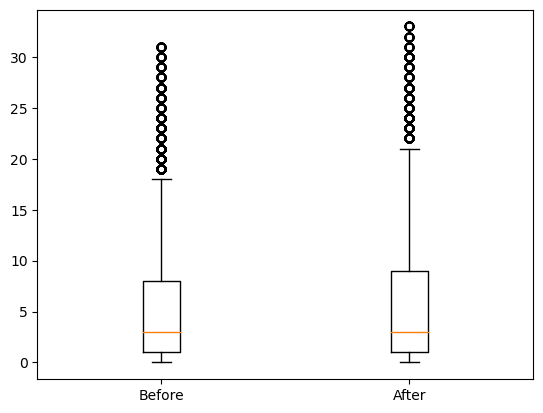

In [51]:
#Intention WMC
create_boxplot('/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Intention/cleaned_WMC.csv')

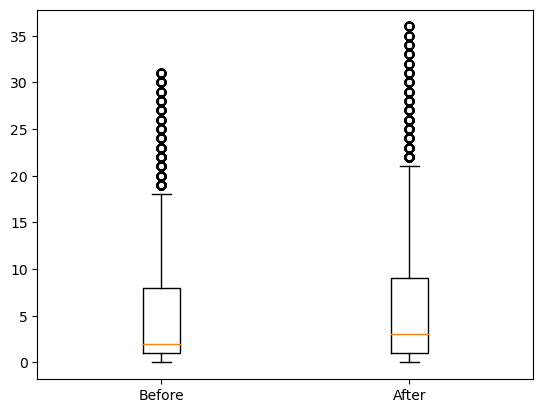

In [52]:
#Operation WMC
create_boxplot('/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Operation/cleaned_WMC.csv')

In [53]:
df_cleaned.shape

(15113, 2)

In [54]:
df.shape

(17727, 2)